In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [123]:
confirmed_df = pd.read_csv("data/covid19_Confirmed_dataset.csv")
deaths_df = pd.read_csv("data/covid19_deaths_dataset.csv")
happiness_df = pd.read_csv("data/worldwide_happiness_report.csv")

# Preview the datasets
print("Confirmed Cases:")
display(confirmed_df.head())

print("\nDeaths:")
display(deaths_df.head())

print("\nHappiness Report:")
display(happiness_df.head())

Confirmed Cases:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27



Deaths:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2



Happiness Report:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [124]:
#Preprocess COVID-19 Data

# Drop unnecessary columns
usless_columns = ['Lat', 'Long', 'Province/State']
confirmed_df_clean = confirmed_df.drop(columns=usless_columns)
deaths_df_clean = deaths_df.drop(columns=usless_columns)

# Group by country and sum all values across provinces/states
confirmed_by_country = confirmed_df_clean.groupby('Country/Region').sum()
deaths_by_country = deaths_df_clean.groupby('Country/Region').sum()

# Preview
print("Confirmed Cases by Country:")
display(confirmed_by_country.head())

Confirmed Cases by Country:


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [125]:
# Calculate Max Infection Rate
confirmed_by_country['Max_infection_rate'] = confirmed_by_country.diff(axis=1).max(axis=1)
covid_max_rate_df = confirmed_by_country[['Max_infection_rate']]

covid_max_rate_df.head()

,Max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [126]:
#Clean Happiness Dataset

# Rename columns for easier handling
happiness_df = happiness_df.rename(columns={
    'Country or region': 'Country',
    'Healthy life expectancy': 'Life_expectancy',
    'GDP per capita': 'GDP_per_capita',
    'Social support': 'Social_support',
})

# Keep only the relevant columns
happiness_clean = happiness_df[['Country', 'Life_expectancy', 'GDP_per_capita', 'Social_support']]

# Preview the cleaned data
happiness_clean.head()

,Country,Life_expectancy,GDP_per_capita,Social_support
0,Finland,0.986,1.340,1.587
1,Denmark,0.996,1.383,1.573
2,Norway,1.028,1.488,1.582
3,Iceland,1.026,1.380,1.624
4,Netherlands,0.999,1.396,1.522


In [127]:
# Merge Datasets

# Reset index to merge
covid_max_rate_df = covid_max_rate_df.reset_index()
covid_max_rate_df = covid_max_rate_df.rename(columns={'Country/Region': 'Country'})

# Merge on Country
merged_df = pd.merge(happiness_clean, covid_max_rate_df, on='Country', how='inner')
merged_df.head()


,Country,Life_expectancy,GDP_per_capita,Social_support,Max_infection_rate
0,Finland,0.986,1.340,1.587,267.0
1,Denmark,0.996,1.383,1.573,391.0
2,Norway,1.028,1.488,1.582,386.0
3,Iceland,1.026,1.380,1.624,99.0
4,Netherlands,0.999,1.396,1.522,1346.0


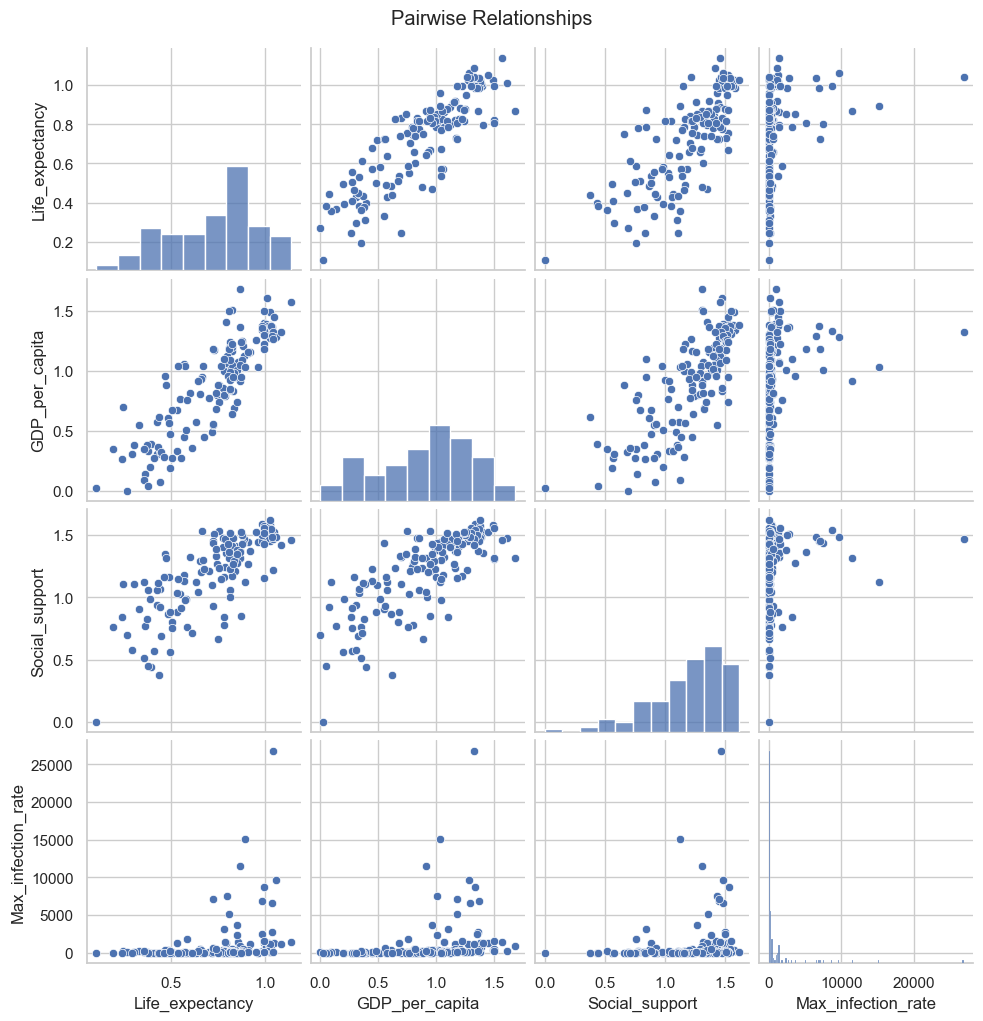

In [128]:
#Exploratory Data Analysis (EDA)
# Pairplot to see relationships
sns.pairplot(merged_df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


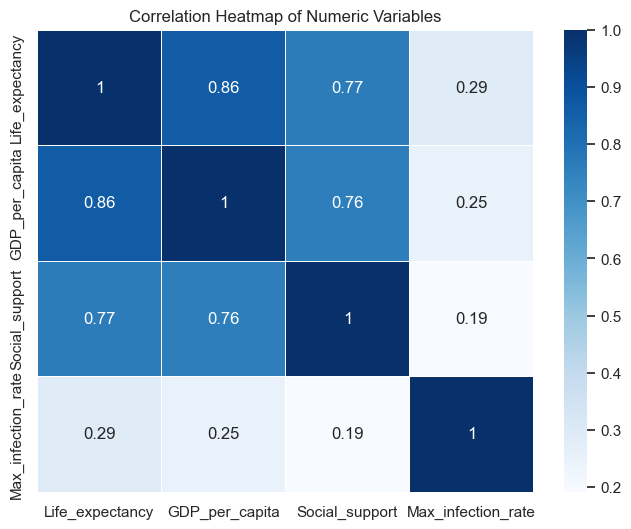

In [129]:
#Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, linewidths=0.5, cmap='Blues')
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()




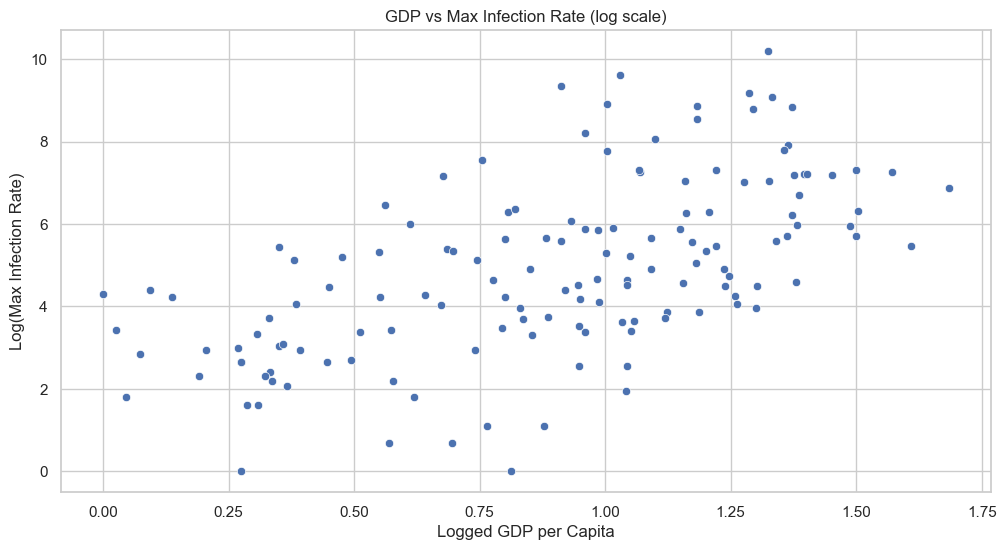

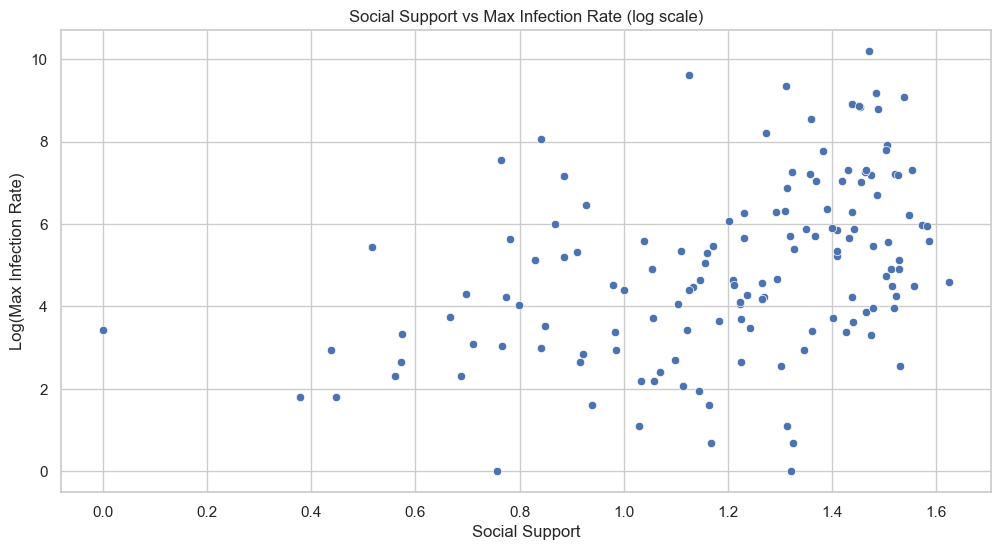

In [130]:
#  Specific Correlation Plots

# GDP vs Max Infection Rate
x =  merged_df["GDP_per_capita"]
y = merged_df["Max_infection_rate"]

sns.scatterplot(x = x, y = np.log(y))
plt.title("GDP vs Max Infection Rate (log scale)")
plt.xlabel("Logged GDP per Capita")
plt.ylabel("Log(Max Infection Rate)")
plt.show()

# Social Support vs Max Infection Rate
x = merged_df["Social_support"]
y = merged_df["Max_infection_rate"]
sns.scatterplot(x = x, y = np.log(y))
plt.title("Social Support vs Max Infection Rate (log scale)")
plt.xlabel("Social Support")
plt.ylabel("Log(Max Infection Rate)")
plt.show()
